In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
print(len(classLabels))

80


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000237ACF60DD0>

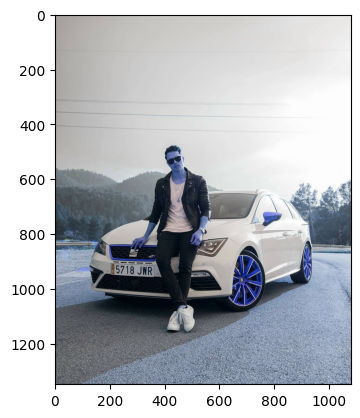

In [7]:
img=cv2.imread('a41103fb8daaf9f391156b8e5efc62e3.jpg')
plt.imshow(img)

In [8]:
classIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [9]:
print(classIndex)

[1]


In [10]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

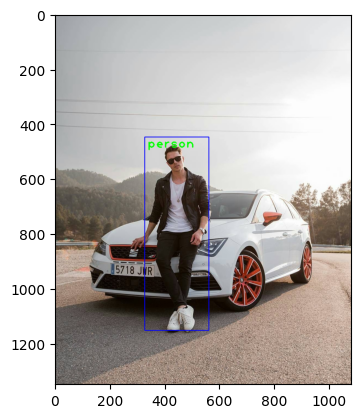

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
cap=cv2.VideoCapture('20250808_144814 - Trim.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open video")
    
font_scale=3 
font=cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow('Object Detection by Rifky', cv2.WINDOW_NORMAL)
while True:
    ret,frame=cap.read()
    if not ret or frame is None or frame.size == 0:
        print("🎞️ End of video.")
        break

    classIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    
    print(classIndex)
    if(len(classIndex)!=0):
        for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                
                original_label = classLabels[ClassInd - 1] if 0 < ClassInd <= len(classLabels) else 'Unknown'
                vehicle_classes = ['bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat']
                label = 'Vehicle' if original_label in vehicle_classes else original_label
                
                cv2.putText(frame, label, (x + 10, y + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.resizeWindow('Object Detection by Rifky', frame.shape[1], frame.shape[0])

    cv2.imshow('Object Detection by Rifky', frame)
    if cv2.waitKey(2) & 0xff==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[1 3 3 3 3 8]
[1 3 3 3 3 8]
[3 3 1 3 3 8 3 8 3]
[3 3 8 3 3 3 1 3 3]
[3 8 3 3 3 3 3 1 8]
[3 3 3 3 3 8 3]
[3 3 3 3 3 3 8]
[3 3 1 3]
[3 3 3 6 3]
[3 3 3 3 3 8]
[3 3]
[3 3 3 3 8 3 3]
[3 3 3 3 8 3 3]
[3 3 3 3 8 3]
[3 3 3 3 3 3 8 6 3]
[3 3 3 3]
[8 3 3 3 3]
[8 3 3 3]
[3 3 3 8 3 3]
[8 3 3 3]
[8 3 3 3]
[3 3 8 3]
[3 3 8 3 3 3]
[3 8 3]
[3 3 3 8 3]
[3 3 8 3 3]
[3 3 8 3 3]
[3 3 3 1 3 3]
[1 3 3]
[1 3 3 3]
[3 1 3]
[3 3 1 3 1]
[3 3 1 1 3]
[1 3]
[3]
[3]
[3 6]
[3]
[6]
[6 3]
[6 3 3]
[3 3 6 3 3 3]
[6 3 3 6]
[3 6 3 3 3]
[3 3 3 6]
[3 3 3 3 6]
[3 3 3]
[3 3 3]
[3 3 6]
[3]
[8 3 6 3]
[3]
[3 8]
[3 8]
[3 3 8 8 6]
[8 3]
[8 3]
[6 6 3 8 3]
[3 3 6 6 3]
[8 6 8 3 3]
[6 3 6 8 8]
[6 3 3 8 6 8]
[6 3 3 8 8 6]
[3 3 3 6 8 3 3]
[6 3 3 3 8 3 8]
[3 3 6 3 3 3 8 3]
[3 3 3 8 3 8 3 3]
[3 3 6 6 3 3 8 3]
[3 6 3 6 8 3 3]
[3 3 6 8 8 3 3 6 3]
[3 6 3 6 3 3 8 3]
[3 6 3 6 3 8 3 3]
[6 8 8 3 1 1 3]
[8 6 8 3 1 3 1]
[6 3 6 3 1 1 8 3 3]
[6 3 3 6 3 3]
[6 3 6 3 1 3 6]
[6 3 3 8 3]
[6 3 3]
[6 3 1 3]
[6 8 3 3 1 3]
[8 3 3 3 3]
[8 3 3 6]
[6 3 3 3]
[6 3